## Keypad Combinations

A keypad on a cellphone has alphabets for all numbers between 2 and 9, as shown in the figure below:

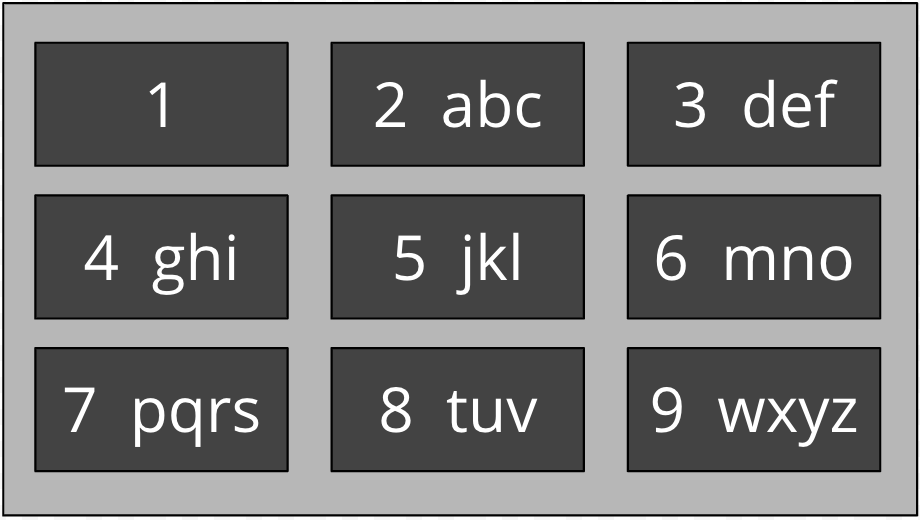

You can make different combinations of alphabets by pressing the numbers.

For example, if you press 23, the following combinations are possible:

`ad, ae, af, bd, be, bf, cd, ce, cf`

Note that because 2 is pressed before 3, the first letter is always an alphabet on the number 2.
Likewise, if the user types 32, the order would be

`da, db, dc, ea, eb, ec, fa, fb, fc`


Given an integer `num`, find out all the possible strings that can be made using digits of input `num`. 
Return these strings in a list. The order of strings in the list does not matter. However, as stated earlier, the order of letters in a particular string matters.

In [2]:
def get_characters(num):
    if num == 2:
        return "abc"
    elif num == 3:
        return "def"
    elif num == 4:
        return "ghi"
    elif num == 5:
        return "jkl"
    elif num == 6:
        return "mno"
    elif num == 7:
        return "pqrs"
    elif num == 8:
        return "tuv"
    elif num == 9:
        return "wxyz"
    else:
        return ""

    
# Recursive Solution
def keypad(num):
    
    # Base case
    if num <= 1:
        return [""]

    # If `num` is single digit, get the LIST having one element - the associated string
    elif 1 < num <= 9:
        return list(get_characters(num))

    # Otherwise `num` >= 10. Find the unit's (last) digits of `num` 
    last_digit = num % 10
    
    '''Step 1'''
    # Recursive call to the same function with “floor” of the `num//10`
    small_output = keypad(num//10)               # returns a LIST of strings
    
    '''Step 2'''
    # Get the associated string for the `last_digit`
    keypad_string = get_characters(last_digit)   # returns a string
    
    '''Permute the characters of result obtained from Step 1 and Step 2'''
    output = list()

    '''
    The Idea:
    Each character of keypad_string must be appended to the 
    end of each string available in the small_output
    '''
    for character in keypad_string:
        for item in small_output:
            new_item = item + character
            output.append(new_item)
    
    return output                                # returns a LIST of strings




In [3]:
def test_keypad(input, expected_output):
    if sorted(keypad(input)) == expected_output:
        print("Yay. We got it right.")
    else:
        print("Oops! That was incorrect.")

In [4]:
# Base case: list with empty string
input = 0
expected_output = [""]
test_keypad(input, expected_output)


# Example case
input = 23
expected_output = sorted(["ad", "ae", "af", "bd", "be", "bf", "cd", "ce", "cf"])
test_keypad(input, expected_output)


# Example case
input = 32
expected_output = sorted(["da", "db", "dc", "ea", "eb", "ec", "fa", "fb", "fc"])
test_keypad(input, expected_output)


# Example case
input = 8
expected_output = sorted(["t", "u", "v"])
test_keypad(input, expected_output)


input = 354
expected_output = sorted(["djg", "ejg", "fjg", "dkg", "ekg", "fkg", "dlg", "elg", "flg", "djh", "ejh", "fjh", "dkh", "ekh", "fkh", "dlh", "elh", "flh", "dji", "eji", "fji", "dki", "eki", "fki", "dli", "eli", "fli"])
test_keypad(input, expected_output)

Yay. We got it right.
Yay. We got it right.
Yay. We got it right.
Yay. We got it right.
Yay. We got it right.


# Deep Reverse
## Problem Statement

Define a procedure, `deep_reverse`, that takes as input a list, and returns a new list that is the deep reverse of the input list.  
This means it reverses all the elements in the list, and if any of those elements are lists themselves, reverses all the elements in the inner list, all the way down. 

>Note: The procedure must not change the input list itself.

**Example**<br>
Input: `[1, 2, [3, 4, 5], 4, 5]`<br>
Output: `[5, 4, [5, 4, 3], 2, 1]`<br>

**Hint**<br>
1. Begin with a blank final list to be returned.
2. Traverse the given list in the reverse order.
 * If an item in the list is a list itself, call the same function.
 * Otheriwse, append the item to the final list.


In [5]:
# Recursive Solution

def deep_reverse(arr):
    
    # Terminaiton / Base condition
    if len(arr) < 1:
        return arr

    reversed_items = []  # final list to be returned
    
    '''Traverse the given list (array) in the reverse direction using extended slice.'''
    # For a given list, sample syntax are - myList[1:10:2], myList[:-1:1], myList[::-1]
    # The first argument is the starting index of the slice (inclusive),
    # second argument is the ending index of the slice (exclusive),
    # third argument is the increment/decrement step size.
    # If we do not specify an argument, it means to consider all elements from that end of the list. 
    for item in arr[::-1]:
        
        # If this item is a list itself, invoke deep_reverse to reverse the items recursively.
        if type(item) is list:
            item = deep_reverse(item)
        
        # append the item to the final list
        reversed_items.append(item)

    return reversed_items

In [6]:
def test_function(test_case):
    arr = test_case[0]
    solution = test_case[1]
    
    output = deep_reverse(arr)
    if output == solution:
        print("Pass")
    else:
        print("False")

In [8]:
arr = [1, 2, 3, 4, 5]
solution = [5, 4, 3, 2, 1]
test_case = [arr, solution]
test_function(test_case)

arr = [1, 2, [3, 4, 5], 4, 5]
solution = [5, 4, [5, 4, 3], 2, 1]
test_case = [arr, solution]
test_function(test_case)

arr = [1, [2, 3, [4, [5, 6]]]]
solution = [[[[6, 5], 4], 3, 2], 1]
test_case = [arr, solution]
test_function(test_case)

arr =  [1, [2,3], 4, [5,6]]
solution = [ [6,5], 4, [3, 2], 1]
test_case = [arr, solution]
test_function(test_case)

Pass
Pass
Pass
Pass
